# AMR Analysis training
## Prerequisite
 * blast (known to work with 2.10.1+)
 * samtools (1.11)
 * skesa
 * prokka (1.14.6)
 * mlst (2.19.6)
 * abricate (1.0.1 | Database: vfdb ecoli_vf ecoh card megares resfinder argannot ncbi plasmidfinder)
 * parsnp 
 ### Data
 1. Reference genome: sample/GCF_000005845.2_ASM584v2_genomic.fna
 2. Sample to analysis: Download [here](https://drive.google.com/drive/folders/1P7_un6I2HzBkObztqbBEffM19ESG2w-u?usp=sharing) and move to samples/ folder 

Download IGV

In [9]:
%%bash
wget https://data.broadinstitute.org/igv/projects/downloads/2.14/IGV_Linux_2.14.1_WithJava.zip -O IGV.zip
unzip IGV.zip

Archive:  IGV.zip
   creating: IGV_Linux_2.14.1/
   creating: IGV_Linux_2.14.1/jdk-11/
   creating: IGV_Linux_2.14.1/jdk-11/lib/
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libawt.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libmanagement_agent.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libsctp.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libverify.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libawt_xawt.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libinstrument.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libjava.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libfontmanager.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libsplashscreen.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libjawt.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libjdwp.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libprefs.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libsunec.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/libj2pkcs11.so  
  inflating: IGV_Linux_2.14.1/jdk-11/lib/liblcms.so  
   creating: IGV_

--2022-09-22 17:44:08--  https://data.broadinstitute.org/igv/projects/downloads/2.14/IGV_Linux_2.14.1_WithJava.zip
Resolving data.broadinstitute.org (data.broadinstitute.org)... 69.173.92.29
Connecting to data.broadinstitute.org (data.broadinstitute.org)|69.173.92.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71472977 (68M) [application/zip]
Saving to: ‘IGV.zip’

     0K .......... .......... .......... .......... ..........  0% 17.8M 4s
    50K .......... .......... .......... .......... ..........  0% 82.4K 7m5s
   100K .......... .......... .......... .......... ..........  0% 89.3K 9m3s
   150K .......... .......... .......... .......... ..........  0% 1.55M 6m58s
   200K .......... .......... .......... .......... ..........  0%  151K 7m6s
   250K .......... .......... .......... .......... ..........  0% 34.6M 5m55s
   300K .......... .......... .......... .......... ..........  0%  164K 6m5s
   350K .......... .......... .......... .......... .....

In [1]:
import os, sys
import numpy as np
import pandas as pd

if not os.path.exists('output'):
    os.makedirs('output')

ModuleNotFoundError: No module named 'ete3'

## Pipeline
### Assembly

Create assembly file with skesa

In [2]:
%%bash
skesa --memory 8 --cores 4 --reads  samples/samples_AS00000197_file-0.fastq.gz samples/samples_AS00000197_file-1.fastq.gz >output/contigs.fasta


skesa --memory 8 --cores 4 --reads samples/samples_AS00000197_file-0.fastq.gz samples/samples_AS00000197_file-1.fastq.gz 

Total reads: 4469477
Reads acquired in  26.485391s wall, 26.100000s user + 0.370000s system = 26.470000s CPU (99.9%)

Kmer len: 19
Raw kmers: 594362962 Memory needed (GB): 11.4118 Memory available (GB): 5.64984 3 cycle(s) will be performed
Distinct kmers: 855416
Kmer count in  81.477610s wall, 311.240000s user + 7.470000s system = 318.710000s CPU (391.2%)
Uniq kmers merging in  0.044238s wall, 0.040000s user + 0.020000s system = 0.060000s CPU (135.6%)
Adapters: 0 Reads before: 4469477 Sequence before: 674813548 Reads after: 4469477 Sequence after: 674813548 Reads clipped: 0
Adapters clipped in  81.531635s wall, 311.290000s user + 7.490000s system = 318.780000s CPU (391.0%)

Kmer len: 21
Raw kmers: 585424008 Memory needed (GB): 11.2401 Memory available (GB): 5.64984 2 cycle(s) will be performed
Distinct kmers: 9227566
Kmer count in  65.377001s wall, 248.640000s user

Assembly file is stored in output/contigs.fasta

In [13]:
%%bash
head output/contigs.fasta

>Contig_1_1002.32_Circ
AAAAAAAAACAGGAAAGGTTAAGCAAAAATTAGGAAAGGTTAAGCAAAAATTAGTATTTCCCTCCCAAAGGTTAAGTGAAAATTAGGTAATCCACACAACCACGCAAAAGGTTATGCCAGTGGAATTGACATAACCAATACGAAAGGTTATGTTAATTTAAAATCACAACCAATGGTTTTAGTCATGGCTGAATTGGTAGTATTCAAAGCAAATGAGCTTGCGGTTAGTCGTTATGACCTAACAGAGCACGAAACGAAACTAATCCTGTTTTGTGTTGCAAAGCTAAACCCCACATTAGAAACACCAGATGAAACTGAACGAACGGTTAAATTTTCATGCTCAGAATATGCTTCATTTATGGGGATAAGTTATGAGAATGCGTGGGGACGCTTAAATACATCAACACGAGAATTATTTAAGCGGTCTATTGAGTTAATATATCCAACAGGTGCTGTATCTATGCGTGTTTTTAATTGGGCTGAATATGCAGAGTTCAATAGGGAAACACAAGAAGTAACTTTAGTATTTAGTAAATATATAATCCCGTTGCTATTTCACCTAAAGAGATTCATTAAATACAACCTCGAGCATGTTAAGTCTTTTGAAAACAAATATTCAATGCGCATTTATGAATGGCTACTAAAAGAACTAACACAAAGAAAAACACATAAAGCCAATATTTCAATAAGTATTGATGATTTTAAATTCATGCTAATGTTAGAAAAAAGCTACCCGGAATATAAATTACTAAACCATTGGGTTTTAAAACCAATATCAAAAGATTTAAATACATATAGCAATATAAAACTATCTATTGATAAGCGCGGTCGTCCTGCTGATACGCTGATCTTTCAAGTTGAACTTGATAAACAAATTGACCTTGTGACTGAGCTAACAAAAGATCCAATATCAAAAAAAGAAGATGATTCAATCCGTTTAACGCCTGAAAATCGTCTGCATGAGGGGCTAAAAACAA

### Sequence typing
Using mslt and pubmlst

In [3]:
%%bash
mlst output/contigs.fasta

output/contigs.fasta	ecoli	-	adk(10)	fumC(11)	gyrB(4)	icd(8)	mdh(8)	purA(~13)	recA(2)


[19:48:19] This is mlst 2.19.0 running on linux with Perl 5.026002
[19:48:19] Checking mlst dependencies:
[19:48:19] Found 'blastn' => /home/quang/miniconda3/envs/amrtraining/bin/blastn
[19:48:19] Found 'any2fasta' => /home/quang/miniconda3/envs/amrtraining/bin/any2fasta
[19:48:21] Found blastn: 2.13.0+ (002013)
[19:48:21] Excluding 2 schemes: ecoli_2 abaumannii
[19:48:24] Excluding ecoli_2.dinB.131 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.69 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.42 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.148 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.134 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.50 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.159 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.33 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.23 due to --exclude option
[19:48:24] Excluding ecoli_2.dinB.133 due to --exclude option
[19:48:24] Excluding

### Annotation genome
Using prokka to annotate genome

In [14]:
%%bash
prokka --force --addgenes --prefix sample --locus sample --outdir output output/contigs.fasta

[tbl2asn-forever] Found Prokka input, correcting dates in .gbf|.sqn files.
[tbl2asn-forever] Correcting dates in output/sample.gbf
[tbl2asn-forever] Correcting dates in output/sample.sqn
[tbl2asn-forever] Dates changed from 01-JAN-2019 to 22-SEP-2022


[17:57:45] This is prokka 1.14.6
[17:57:45] Written by Torsten Seemann <torsten.seemann@gmail.com>
[17:57:45] Homepage is https://github.com/tseemann/prokka
[17:57:45] Local time is Thu Sep 22 17:57:45 2022
[17:57:45] You are quang
[17:57:45] Operating system is linux
[17:57:45] You have BioPerl 1.007002
[17:57:45] System has 4 cores.
[17:57:45] Option --cpu asked for 8 cores, but system only has 4
[17:57:45] Will use maximum of 4 cores.
[17:57:45] Annotating as >>> Bacteria <<<
[17:57:45] Re-using existing --outdir output
[17:57:45] Using filename prefix: sample.XXX
[17:57:45] Setting HMMER_NCPU=1
[17:57:45] Writing log to: output/sample.log
[17:57:45] Command: /home/quang/miniconda3/envs/amrtraining/bin/prokka --force --addgenes --prefix sample --locus sample --outdir output output/contigs.fasta
[17:57:45] Appending to PATH: /home/quang/miniconda3/envs/amrtraining/bin
[17:57:45] Looking for 'aragorn' - found /home/quang/miniconda3/envs/amrtraining/bin/aragorn
[17:57:45] Determined ar

### Detect AMR genes
Using abricate with ncbi database to find AMR genes

In [5]:
%%bash
abricate --quiet  --nopath --db ncbi output/contigs.fasta > output/sample_resistome.tsv

In [ ]:
head output/sample_resistome.tsv

### Variant calling
Alignment with reference genome

In [1]:
%%bash
bwa index samples/GCF_000005845.2_ASM584v2_genomic.fna.gz
bwa mem samples/GCF_000005845.2_ASM584v2_genomic.fna samples/samples_AS00000197_file-0.fastq.gz samples/samples_AS00000197_file-1.fastq.gz  > output/aln-pe.sam


[bwa_index] Pack FASTA... 0.10 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.50 seconds elapse.
[bwa_index] Update BWT... 0.05 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 0.54 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index samples/GCF_000005845.2_ASM584v2_genomic.fna.gz
[main] Real time: 3.218 sec; CPU: 2.223 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 66226 sequences (10000126 bp)...
[M::process] read 66226 sequences (10000126 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 19012, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (390, 453, 526)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (118, 798)
[M::mem_pestat] mean and std.dev: (460.45, 104.01)
[M::mem_pestat] low and high boundaries 

In [ ]:
%%bash
head output/aln-pe.sam

Variant calling with bcftools

In [2]:
%%bash
samtools view -S -b output/aln-pe.sam > output/aln-pe.bam
samtools sort  output/aln-pe.bam > output/aln-sorted.bam
samtools index output/aln-sorted.bam output/aln-sorted.bam.bai
bcftools mpileup -f samples/GCF_000005845.2_ASM584v2_genomic.fna output/aln-sorted.bam | bcftools call -mv  -Ov > output/variants.vcf

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [7]:
%%bash
head output/variants.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.10+htslib-1.10.2
##bcftoolsCommand=mpileup -f samples/GCF_000005845.2_ASM584v2_genomic.fna output/aln-sorted.bam
##reference=file://samples/GCF_000005845.2_ASM584v2_genomic.fna
##contig=<ID=NC_000913.3,length=4641652>
##ALT=<ID=*,Description="Represents allele(s) other than observed.">
##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">
##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">
##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">


### Put all together with IGV viewer
Using IGV to display all ouput files

In [10]:
%%bash
./IGV_Linux_2.14.1/igv.sh

Process is terminated.


### Phylogeny
Make phylogeny tree with parsnp

In [5]:
%%bash
parsnp -r samples/GCF_000005845.2_ASM584v2_genomic.fna -d samples/*.fna output/contigs.fasta -o output -c

Ref samples/GCF_000005845.2_ASM584v2_genomic.fna


22:21:17 - INFO - |--Parsnp 1.7.4--|

22:21:29 - INFO - 
***********************
SETTINGS:
|-refgenome:	samples/GCF_000005845.2_ASM584v2_genomic.fna
|-genomes:	
	samples/GCF_000005845.2_ASM584v2_genomic.fna
	samples/GCF_018499845.2_ASM1849984v2_genomic.fna
	...1 more file(s)...
	samples/GCF_021397815.1_ASM2139781v1_genomic.fna
	output/contigs.fasta
|-aligner:	muscle
|-outdir:	output
|-OS:	Linux
|-threads:	1
***********************
    
22:21:29 - INFO - <<Parsnp started>>
22:21:29 - INFO - No genbank file provided for reference annotations, skipping..
22:21:29 - INFO - Running Parsnp multi-MUM search and libMUSCLE aligner...
22:22:12 - INFO - Reconstructing core genome phylogeny...
22:22:13 - INFO - Aligned 5 genomes in 55.95 seconds
22:22:13 - INFO - Parsnp finished! All output available in output


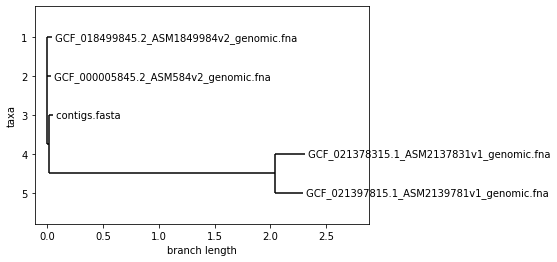

In [6]:
from Bio import Phylo
tree = Phylo.read('output/parsnp.tree', "newick")
tree.ladderize()
Phylo.draw(tree)